su trainding view, spx500, collegamenti con storia

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from datetime import datetime
from sklearn.preprocessing import StandardScaler

In [3]:
data=pd.read_csv("./sp500.csv", usecols=["Date","SP500"],
                parse_dates=["Date"], index_col="Date")
#definiamo le colonne fin da subito, diciamo di interpretare la data come data
data

,SP500
Date,
1871-01-01,4.44
1871-02-01,4.50
1871-03-01,4.61
1871-04-01,4.74
1871-05-01,4.86
...,...
2017-12-01,2664.34
2018-01-01,2789.80
2018-02-01,2705.16


In [5]:
data=data["1900-01-01":]
data

,SP500
Date,
1900-01-01,6.10
1900-02-01,6.21
1900-03-01,6.26
1900-04-01,6.34
1900-05-01,6.04
...,...
2017-12-01,2664.34
2018-01-01,2789.80
2018-02-01,2705.16


day from 1900-> ci segnamo i giorni

In [8]:
data["DF1900"]=(data.index-pd.to_datetime("1900-01-01")).days
data.set_index("DF1900", inplace=True)#impostiamo la dolonna come indice, solo valori numerici

data["DF1900"]=data.index
data

,SP500,DF1900
DF1900,,
0,6.10,0
31,6.21,31
59,6.26,59
90,6.34,90
120,6.04,120
...,...,...
43068,2664.34,43068
43099,2789.80,43099
43130,2705.16,43130


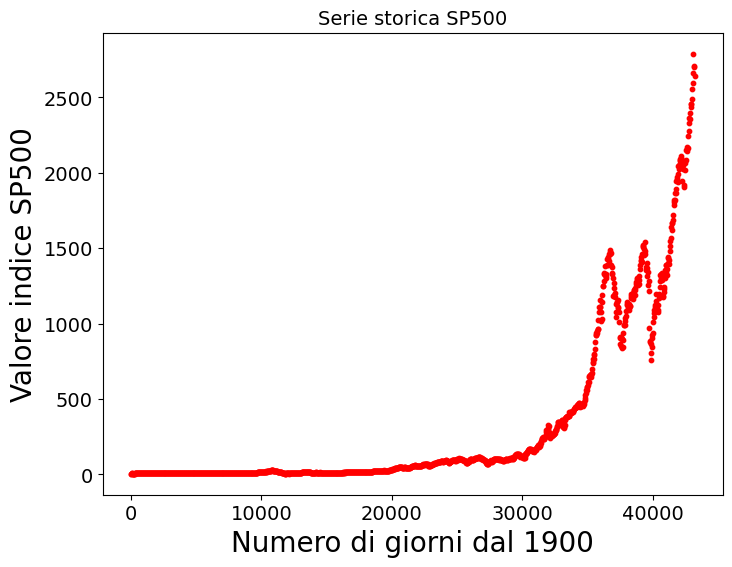

In [12]:
fig,ax=plt.subplots(figsize=(8,6))
ax.tick_params(axis="both",labelsize=14)
ax.set_title("Serie storica SP500", fontsize=14)
ax.scatter(data["DF1900"],data["SP500"],label="Dati campionati", color="r",s=10.)
ax.set_ylabel("Valore indice SP500",fontsize=20)
ax.set_xlabel("Numero di giorni dal 1900",fontsize=20)
plt.show()

In [26]:
x=data[["DF1900"]].values
y=data[["SP500"]].values

sc_x=StandardScaler()
sc_y=StandardScaler()

x_sc=sc_x.fit_transform(x)
y_sc=sc_y.fit_transform(y)

In [18]:
reg = LinearRegression().fit(x_sc,y_sc)

print(f"""
coefficiente di determinazione R^2 {reg.score(x_sc,y_sc):.2f}
coefficiente angolare {reg.coef_[0][0]:.2f}
intercetta: {reg.intercept_[0]:.2f}
""")


coefficiente di determinazione R^2 0.55
coefficiente angolare 0.74
intercetta: 0.00



come target possiamo usare il logaritmo del prezzo

In [28]:
x=data[["DF1900"]].values
y=np.log(data[["SP500"]].values)

sc_x=StandardScaler()
sc_y=StandardScaler()

x_sc=sc_x.fit_transform(x)
y_sc=sc_y.fit_transform(y)

In [29]:
reg = LinearRegression().fit(x_sc,y_sc)

print(f"""
coefficiente di determinazione R^2 {reg.score(x_sc,y_sc):.2f}
coefficiente angolare {reg.coef_[0][0]:.2f}
intercetta: {reg.intercept_[0]:.2f}
""")


coefficiente di determinazione R^2 0.92
coefficiente angolare 0.96
intercetta: 0.00



In [30]:
data["Linear Regression"]=sc_y.inverse_transform(reg.predict(x_sc))

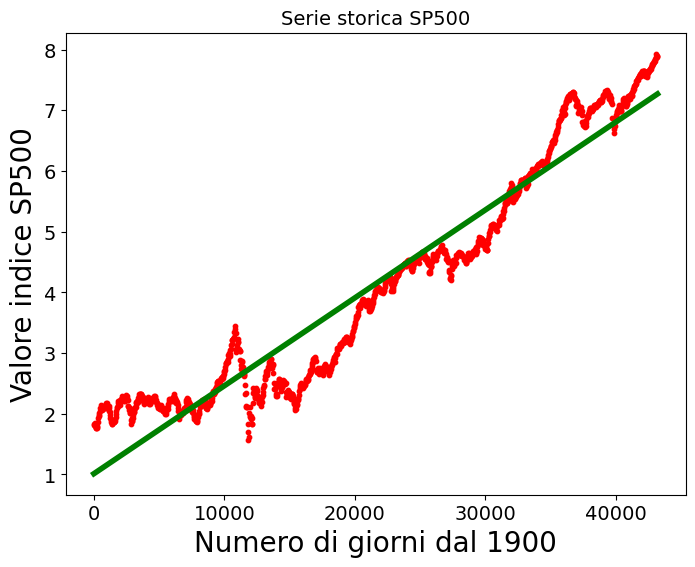

In [31]:
fig,ax=plt.subplots(figsize=(8,6))
ax.tick_params(axis="both",labelsize=14)
ax.set_title("Serie storica SP500", fontsize=14)
ax.scatter(x,y,label="Dati campionati", color="r",s=10.)
data["Linear Regression"].plot(label="", lw=4, color="g",ax=ax)
ax.set_ylabel("Valore indice SP500",fontsize=20)
ax.set_xlabel("Numero di giorni dal 1900",fontsize=20)
plt.show()